Reconhecimento de Sinais libras

In [1]:
from google.colab import drive
#para autenticar o caminho
drive.mount('/content/drive')

Mounted at /content/drive


Importando bibliotecas

In [2]:
zip_path = '/content/drive/MyDrive/re des/dataSet_colorido_libras.zip'

In [3]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/redes/dataSet_colorido_libras.zip'
extract_path = '/content/dataSet_colorido_libras'

# Extrair o conteúdo do arquivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listar os arquivos no diretório de extração
extracted_files = os.listdir(extract_path)
print(f'Arquivos extraídos: {extracted_files}')


Arquivos extraídos: ['dataSet_colorido_libras']


In [4]:
import zipfile  # extrair o zip
from io import BytesIO  # reconhecer numeros binarios e converter
from PIL import Image
import matplotlib.pyplot as plt  # plotar graficos
import os  # SO do computador
import shutil  # para manipulação de arquivos e diretorios
import pandas as pd
from sklearn.preprocessing import StandardScaler  # padronizar os dados
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from os.path import join
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam


Manipulação do Dataset

In [5]:
import numpy as np
import os, sys
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt
import itertools
import scipy.stats
import tensorflow as tf
from keras import applications, optimizers, Input
from keras.models import Sequential, Model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels

import zipfile
zip_path = '/content/drive/MyDrive/redes/dataSet_colorido_libras.zip'
extract_path = '/content/dataSet_colorido_libras'


folder = '/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train'
#mudei essas linhas de baixo pois estava em 120
image_width = 120
image_height = 213
nova_altura = 213
nova_largura = 120

channels = 3

train_files = []
i=0
for coin in ['bus_renamed', 'bank_renamed', 'car_renamed', 'formation_renamed', 'hospital_renamed','I_renamed', 'man_renamed', 'motorcycle_renamed', 'my_renamed', 'supermarket_renamed', 'we_renamed',
             'woman_renamed', 'you_renamed', 'you (plural)_renamed', 'your_renamed']:
    onlyfiles = [f for f in os.listdir(folder + '/' + str(coin)) if os.path.isfile(os.path.join(folder + '/' + str(coin), f))]
    for _file in onlyfiles:
        train_files.append(_file)

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)
y_dataset = []

i = 0
for coin in ['bus_renamed', 'bank_renamed', 'car_renamed', 'formation_renamed', 'hospital_renamed','I_renamed', 'man_renamed', 'motorcycle_renamed', 'my_renamed', 'supermarket_renamed', 'we_renamed',
             'woman_renamed', 'you_renamed', 'you (plural)_renamed', 'your_renamed']:
    onlyfiles = [f for f in os.listdir(folder + '/' + str(coin)) if os.path.isfile(os.path.join(folder + '/' + str(coin), f))]
    for _file in onlyfiles:
        img = load_img(folder + '/' +  str(coin) + '/' + _file)  # this is a PIL image
        img.thumbnail((image_width, image_height))
        # Convert to Numpy Array
        #x = img_to_array(img)
        img = cv2.resize(img_to_array(img) , (nova_largura, nova_altura))
        # open with opencv
        x = np.array(img)
        #x = np.array(cv2.imread(folder + '/' +  str(coin) + '/' + _file))
        #x = x.reshape((120 ,213 ,3))
        # Normalize
        #x = (x - 128.0) / 128.0
        dataset[i] = x
        mapping = {'bus_renamed': 0 , 'bank_renamed': 1 , 'car_renamed' : 2 , 'formation_renamed': 3 , 'hospital_renamed' : 4 ,'I_renamed' : 5 , 'man_renamed' : 6 , 'motorcycle_renamed' : 7 , 'my_renamed' : 8 , 'supermarket_renamed' : 9 , 'we_renamed' : 10 ,
             'woman_renamed'  : 11 , 'you_renamed' : 12 , 'you (plural)_renamed' : 13  , 'your_renamed' : 14 }
        y_dataset.append(mapping[coin])
        i += 1
        #if i % 250 == 0:
        if i == 500:
            print("%d images to array" % i)
            break

print("All images to array!")


500 images to array
All images to array!


In [6]:
# normalize
dataset = dataset.astype('float32')
dataset /= 255

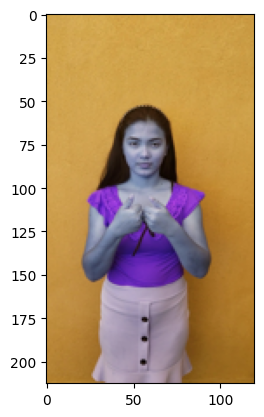

In [7]:
pixels = np.array(dataset[0], dtype='float32')
#pixels = pixels.reshape((64, 64, 3))
plt.imshow(cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB))
plt.show()
#print(scaled_labels[0])

In [8]:
# categorical values
n_classes = len(set(y_dataset))
print(n_classes)

y_dataset_ = to_categorical(y_dataset, n_classes)

15


In [9]:
# Assuming dataset is the larger variable and y_dataset_ is the smaller one

# Trim dataset to match the size of y_dataset_
dataset_trimmed = dataset[:len(y_dataset_)]

# Now both dataset_trimmed and y_dataset_ have the same size
# You can then proceed with splitting or any other operations

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset_trimmed, y_dataset_, test_size=0.2)

print("Train set size: {0}, Test set size: {1}".format(len(X_train), len(X_test)))


Train set size: 5716, Test set size: 1430


Modelo CNN

In [10]:
# Criar o modelo
model = Sequential()

model.add(BatchNormalization(input_shape=(image_height, image_width, 3)))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))  # Adiciona a camada de dropout

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))  # Adiciona a camada de dropout

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.5))  # Adiciona a camada de dropout

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.5))  # Adiciona a camada de dropout

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Adiciona a camada de dropout
model.add(Dense(15, activation='softmax'))  # Especifica 'softmax' como a função de ativação


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 213, 120, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 213, 120, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 106, 60, 256)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 106, 60, 256)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 60, 128)      295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 30, 128)       0

In [11]:

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Configurar EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Treinar o modelo
history = model.fit(X_train,y_train,validation_split= 0.2, epochs=50, callbacks=[early_stopping], batch_size=64)

Epoch 1/50
72/72 [==============================] - 60s 650ms/step - loss: 2.3495 - accuracy: 0.5698 - val_loss: 2.5744 - val_accuracy: 0.6154
Epoch 2/50
72/72 [==============================] - 37s 518ms/step - loss: 0.9299 - accuracy: 0.7082 - val_loss: 2.0126 - val_accuracy: 0.6906
Epoch 3/50
72/72 [==============================] - 37s 514ms/step - loss: 0.6702 - accuracy: 0.7859 - val_loss: 1.2226 - val_accuracy: 0.8383
Epoch 4/50
72/72 [==============================] - 37s 514ms/step - loss: 0.5408 - accuracy: 0.8259 - val_loss: 0.6058 - val_accuracy: 0.8689
Epoch 5/50
72/72 [==============================] - 37s 515ms/step - loss: 0.4670 - accuracy: 0.8427 - val_loss: 0.3526 - val_accuracy: 0.9222
Epoch 6/50
72/72 [==============================] - 37s 515ms/step - loss: 0.3864 - accuracy: 0.8745 - val_loss: 0.2816 - val_accuracy: 0.9336
Epoch 7/50
72/72 [==============================] - 37s 514ms/step - loss: 0.3592 - accuracy: 0.8852 - val_loss: 0.2252 - val_accuracy: 0.9362

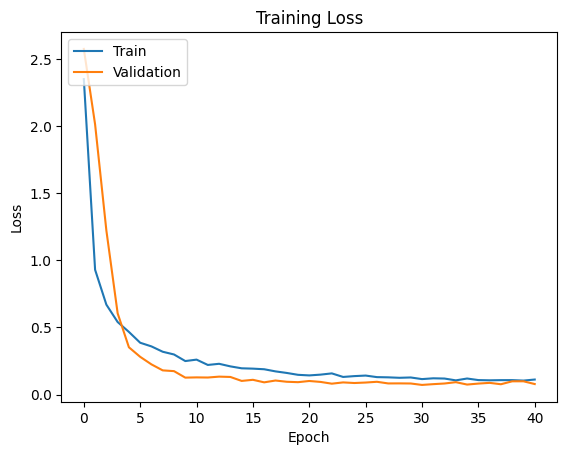

In [15]:
# Visualizar a perda durante o treinamento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.yscale('log')

plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
preds = model.predict(X_test)

45/45 [==============================] - 4s 50ms/step


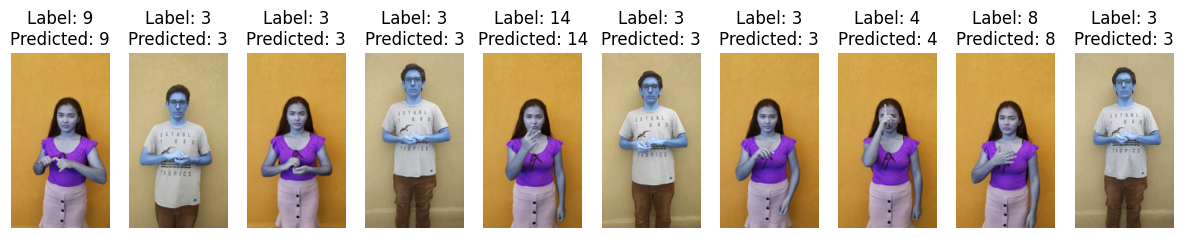

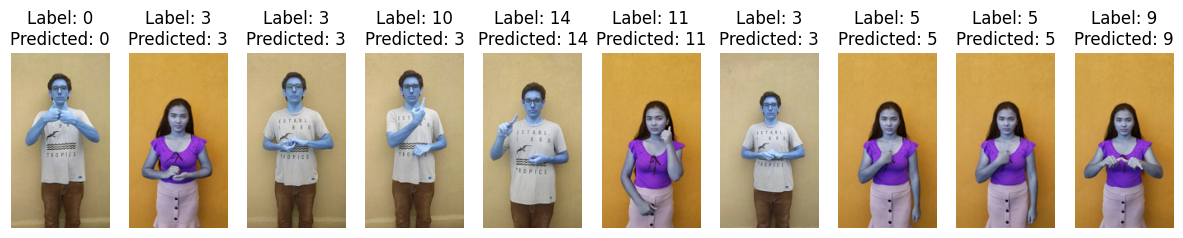

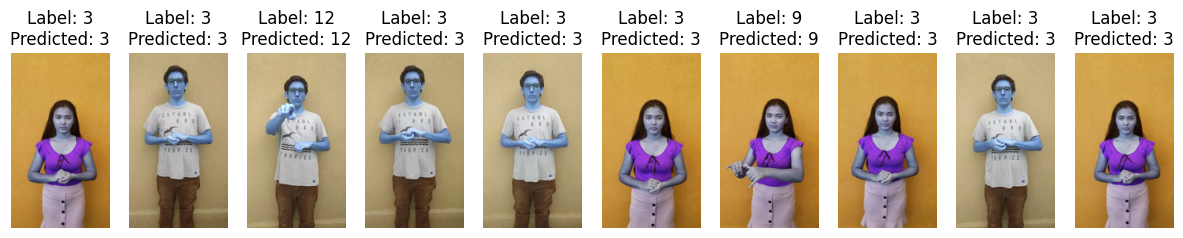

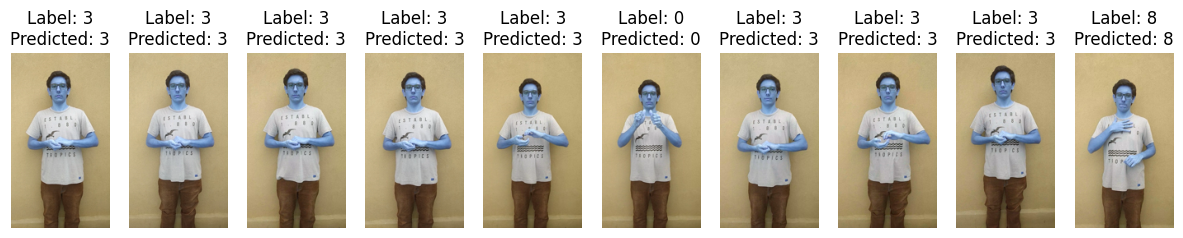

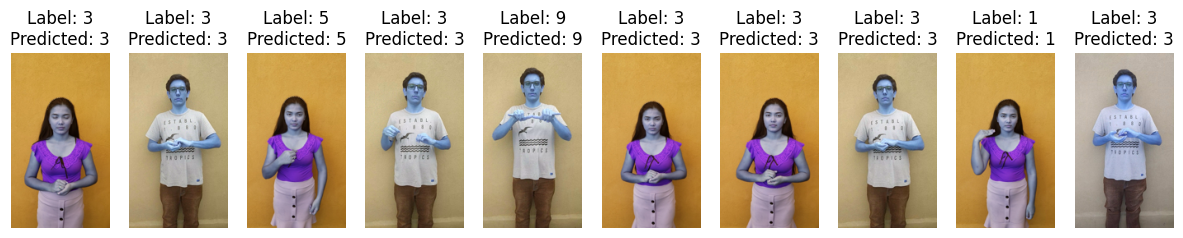

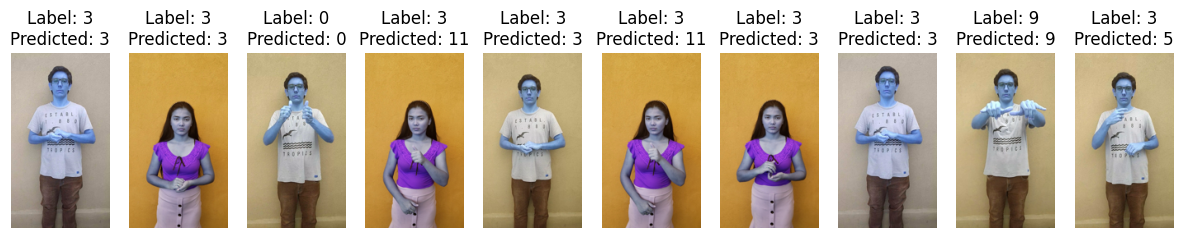

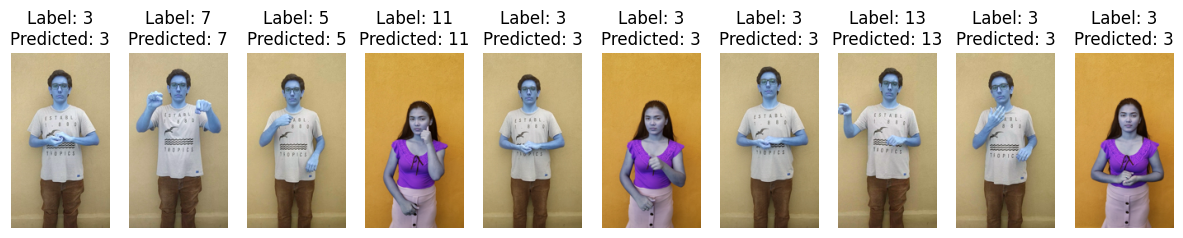

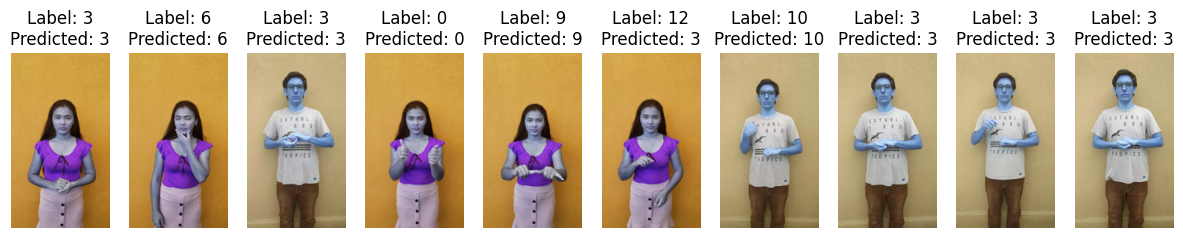

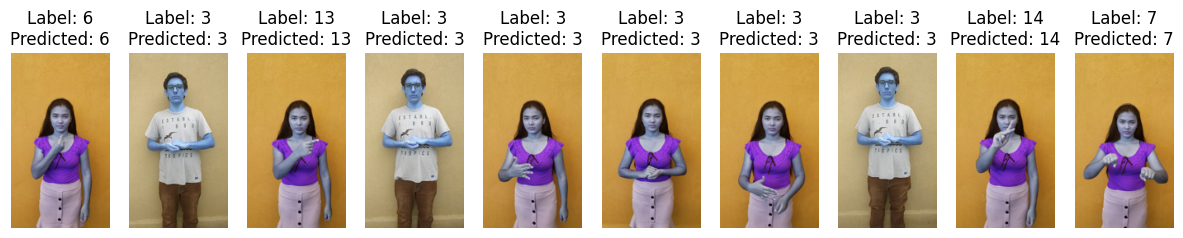

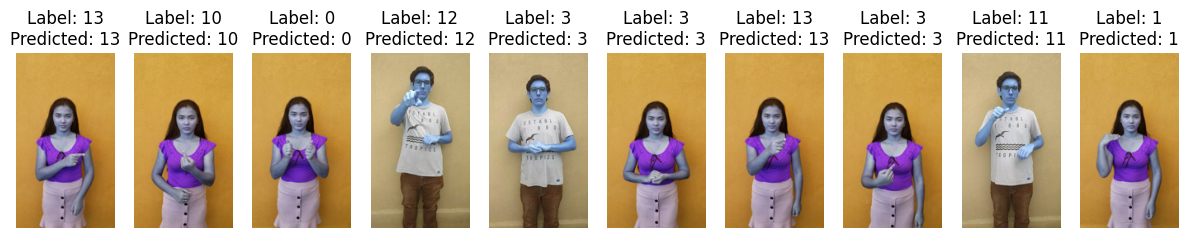

In [17]:
n = 10
for t in range(10):
    plt.figure(figsize=(15,15))
    for i in range(n*t, n*(t+1)):
        plt.subplot(1, n, i + 1 - n*t)
        plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB), cmap='gray')
        plt.title('Label: {}\nPredicted: {}'.format(np.argmax(y_test[i]), np.argmax(preds[i])))
        plt.axis('off')
    plt.show()

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True class')
    plt.xlabel('Predicted class')

Confusion matrix, without normalization
[[ 55   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0  43   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0   0   0   0   0   0]
 [  2   3   1 850   0   1   2   2   1   3   2   7   3   2   2]
 [  0   0   0   0  35   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0  31   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  35   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  50   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0  38   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0  45   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  50   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  33]]


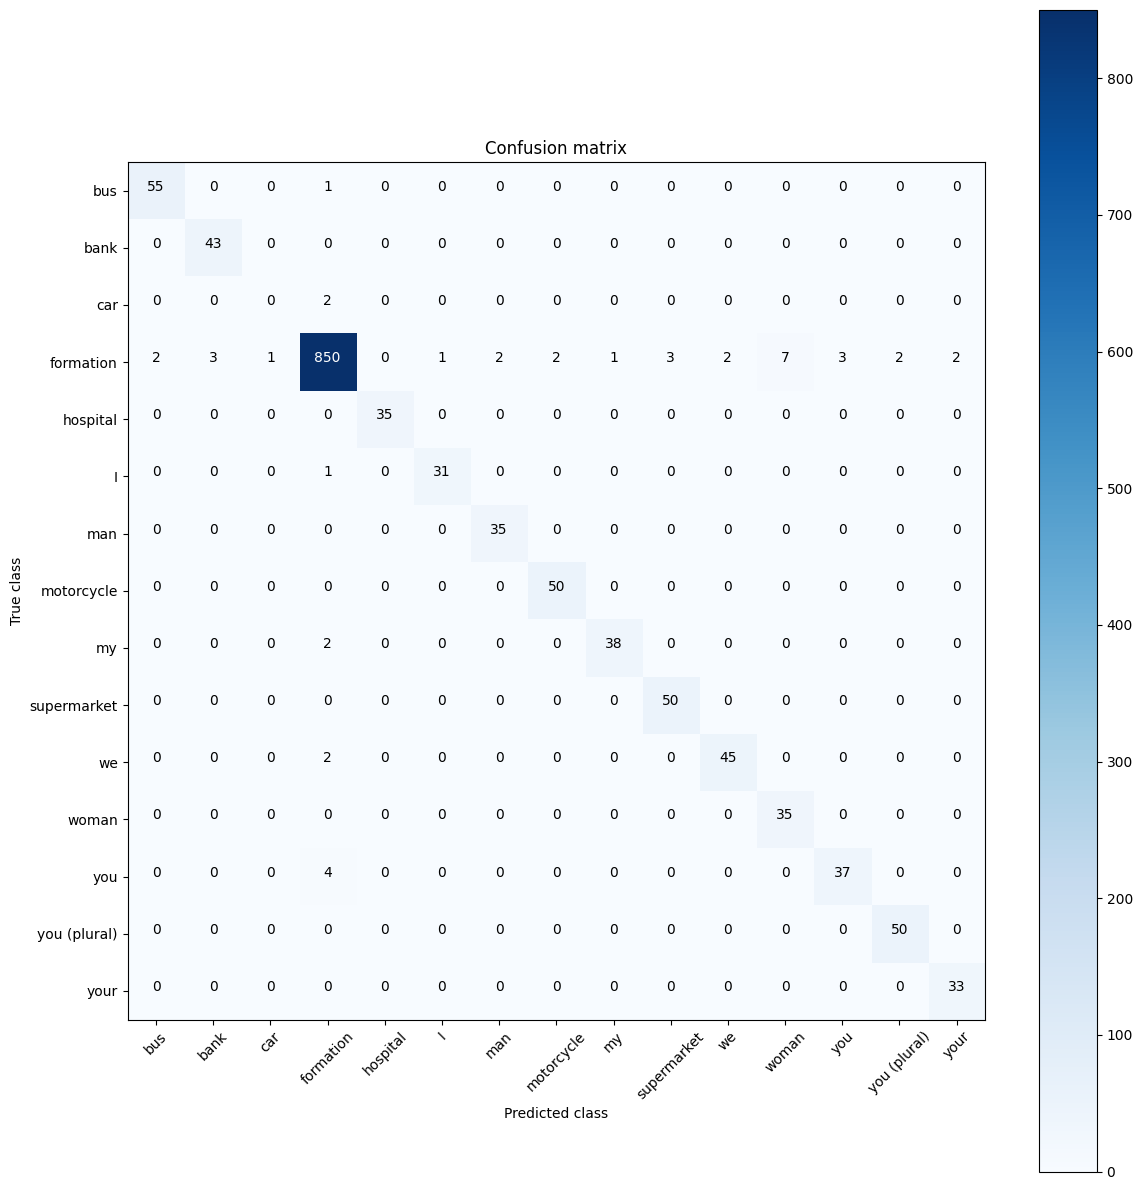

In [23]:
# Plot non-normalized confusion matrix
#y_test_ = np.apply_along_axis(np.argmax, 1, y_test)
#preds_ = np.apply_along_axis(np.argmax, 1, preds)
y_test_ = [np.argmax(x) for x in y_test]
preds_ = [np.argmax(x) for x in preds]

cm = confusion_matrix(y_test_, preds_)
plt.figure(figsize= (12,12))
plot_confusion_matrix(cm, classes=['bus', 'bank', 'car', 'formation', 'hospital', 'I', 'man', 'motorcycle', 'my', 'supermarket', 'we', 'woman', 'you', 'you (plural)', 'your']
, title='Confusion matrix')
plt.show()

In [19]:
# prompt: save this is a model

model.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import pandas as pd

historico = pd.DataFrame(history.history)

In [25]:
historico.head()

,loss,accuracy,val_loss,val_accuracy
0,2.349481,0.569773,2.574445,0.615385
1,0.929937,0.708224,2.012623,0.690559
2,0.670187,0.785870,1.222587,0.838287
3,0.540812,0.825897,0.605801,0.868881
4,0.466968,0.842738,0.352570,0.922203


In [27]:
historico.to_csv('historico.csv')